In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', sep=';')

In [3]:
df.tail(50)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
1170461,7/1-2 S,3162.4724,444920.375,6421578.5,-3101.613281,VESTLAND GP.,Bryne Fm.,8.417912,0.813694,0.853397,...,26.191324,NaN,NaN,-0.026922,NaN,NaN,27.806280,NaN,30000,2.0
1170462,7/1-2 S,3162.6244,444920.375,6421578.5,-3101.765381,VESTLAND GP.,Bryne Fm.,8.431474,0.775601,0.821218,...,26.658792,NaN,NaN,-0.043151,NaN,NaN,27.689194,NaN,30000,2.0
1170463,7/1-2 S,3162.7764,444920.375,6421578.5,-3101.917236,VESTLAND GP.,Bryne Fm.,8.440473,0.738265,0.785831,...,27.271425,NaN,NaN,-0.052377,NaN,NaN,27.572121,NaN,30000,2.0
1170464,7/1-2 S,3162.9284,444920.375,6421578.5,-3102.069336,VESTLAND GP.,Bryne Fm.,8.428319,0.713266,0.760344,...,27.908949,NaN,NaN,-0.050369,NaN,NaN,27.455156,NaN,30000,2.0
1170465,7/1-2 S,3163.0804,444920.375,6421578.5,-3102.221191,VESTLAND GP.,Bryne Fm.,8.403874,0.713621,0.759561,...,28.579369,NaN,NaN,-0.058302,NaN,NaN,27.431200,NaN,30000,2.0
1170466,7/1-2 S,3163.2324,444920.375,6421578.5,-3102.373291,VESTLAND GP.,Bryne Fm.,8.444242,0.748154,0.794013,...,28.994408,NaN,NaN,-0.016534,NaN,NaN,27.465071,NaN,30000,2.0
1170467,7/1-2 S,3163.3844,444920.375,6421578.5,-3102.525391,VESTLAND GP.,Bryne Fm.,8.476058,0.827858,0.876300,...,29.382940,NaN,NaN,0.005642,NaN,NaN,27.507681,NaN,30000,2.0
1170468,7/1-2 S,3163.5364,444920.375,6421578.5,-3102.677246,VESTLAND GP.,Bryne Fm.,8.479875,0.981226,1.038323,...,29.410231,NaN,NaN,-0.000606,NaN,NaN,27.550150,NaN,30000,2.0
1170469,7/1-2 S,3163.6884,444920.375,6421578.5,-3102.829346,VESTLAND GP.,Bryne Fm.,8.473578,1.262254,1.341351,...,29.330244,NaN,NaN,-0.002447,NaN,NaN,27.592707,NaN,30000,2.0
1170470,7/1-2 S,3163.8404,444920.375,6421578.5,-3102.981201,VESTLAND GP.,Bryne Fm.,8.465072,1.715842,1.840237,...,27.188431,NaN,NaN,0.005731,NaN,NaN,27.635315,NaN,30000,2.0


The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate 
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

See contest page for full list.

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

### Labels: Lithology

In [4]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

In [5]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

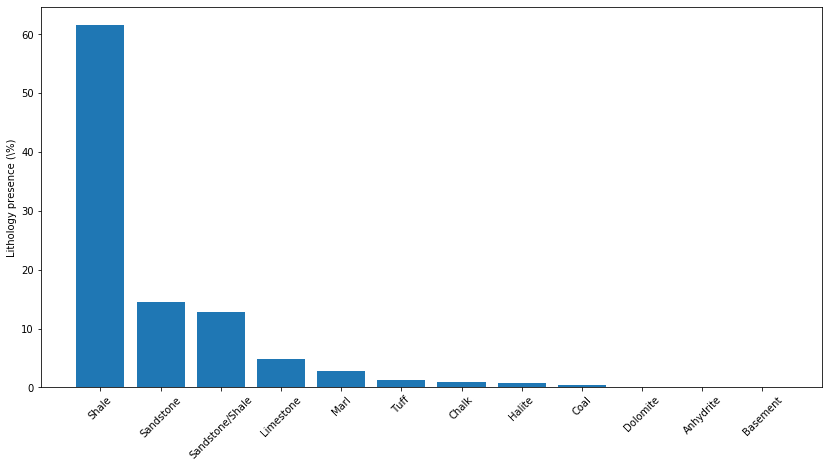

In [6]:
counts = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)');

### Missing Values

In [7]:
df.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [8]:
len(df)

1170511

Only WELL, DEPTH_md, GR, AND FORCE_2020_LITHOFACIES_LITHOLOGY have no missing values.

#### X_LOC, Y_LOC, and Z_LOC

- Less than 1% of observations have missing X_LOC, Y_LOC, and Z_LOC data

- Z_LOC and DEPTH_MD are very strongly (negatively) correlated

STRATEGY:

- FILL missing Z_LOC values with -(DEPTH_MD)

- FILL missing X_LOC and Y_LOC values based on median for each well

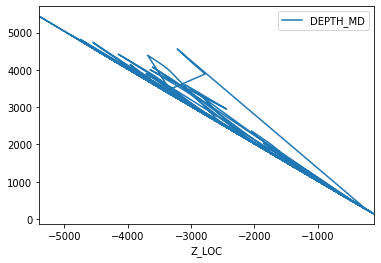

In [9]:
# Check correlation of Z_LOC with 'DEPTH_MD'

df.plot('Z_LOC', 'DEPTH_MD');

In [10]:
# Fill missing Z_LOC values with the negative of depth

df.Z_LOC.fillna(-df.DEPTH_MD, inplace=True)

Get all unique wells

In [11]:
unique_wells = df.WELL.unique()
print(unique_wells)

['15/9-13' '15/9-15' '15/9-17' '16/1-2' '16/1-6 A' '16/10-1' '16/10-2'
 '16/10-3' '16/10-5' '16/11-1 ST3' '16/2-11 A' '16/2-16' '16/2-6' '16/4-1'
 '16/5-3' '16/7-4' '16/7-5' '16/8-1' '17/11-1' '25/11-15' '25/11-19 S'
 '25/11-5' '25/2-13 T4' '25/2-14' '25/2-7' '25/3-1' '25/4-5' '25/5-1'
 '25/5-4' '25/6-1' '25/6-2' '25/6-3' '25/7-2' '25/8-5 S' '25/8-7' '25/9-1'
 '26/4-1' '29/6-1' '30/3-3' '30/3-5 S' '30/6-5' '31/2-1' '31/2-19 S'
 '31/2-7' '31/2-8' '31/2-9' '31/3-1' '31/3-2' '31/3-3' '31/3-4' '31/4-10'
 '31/4-5' '31/5-4 S' '31/6-5' '31/6-8' '32/2-1' '33/5-2' '33/6-3 S'
 '33/9-1' '33/9-17' '34/10-19' '34/10-21' '34/10-33' '34/10-35' '34/11-1'
 '34/11-2 S' '34/12-1' '34/2-4' '34/3-1 A' '34/4-10 R' '34/5-1 A'
 '34/5-1 S' '34/7-13' '34/7-20' '34/7-21' '34/8-1' '34/8-3' '34/8-7 R'
 '35/11-1' '35/11-10' '35/11-11' '35/11-12' '35/11-13' '35/11-15 S'
 '35/11-6' '35/11-7' '35/12-1' '35/3-7 S' '35/4-1' '35/8-4' '35/8-6 S'
 '35/9-10 S' '35/9-2' '35/9-5' '35/9-6 S' '36/7-3' '7/1-1' '7/1-2 S']


In [12]:
# Create dictionaries with median X_LOC and Y_LOC for each well

X_LOC_medians = {}
Y_LOC_medians = {}

for well in unique_wells:
    X_LOC_medians[well] = df.loc[df['WELL']==well]['X_LOC'].median()
    Y_LOC_medians[well] = df.loc[df['WELL']==well]['Y_LOC'].median()

print(X_LOC_medians)
print(Y_LOC_medians)

{'15/9-13': 437631.1875, '15/9-15': 436811.4375, '15/9-17': 438596.125, '16/1-2': 455221.34375, '16/1-6 A': 459498.9375, '16/10-1': 444152.40625, '16/10-2': 443273.15625, '16/10-3': 460424.875, '16/10-5': 448702.25, '16/11-1 ST3': 474568.25, '16/2-11 A': 475432.6875, '16/2-16': 476768.21875, '16/2-6': 477771.21875, '16/4-1': 449955.8125, '16/5-3': 474409.9375, '16/7-4': 442819.3125, '16/7-5': 446273.65625, '16/8-1': 466870.53125, '17/11-1': 520153.1875, '25/11-15': 470521.96875, '25/11-19 S': 465878.46875, '25/11-5': 463756.0, '25/2-13 T4': 469370.1875, '25/2-14': 476896.28125, '25/2-7': 479877.78125, '25/3-1': 487284.0625, '25/4-5': 454469.53125, '25/5-1': 475870.78125, '25/5-4': 470379.375, '25/6-1': 488709.9375, '25/6-2': 489831.28125, '25/6-3': 495714.5, '25/7-2': 454816.625, '25/8-5 S': 463973.78125, '25/8-7': 475895.84375, '25/9-1': 483537.65625, '26/4-1': 501137.6875, '29/6-1': 444572.28125, '30/3-3': 497355.75, '30/3-5 S': 496869.671875, '30/6-5': 497435.96875, '31/2-1': 530205

In [13]:
# Replace X_LOC and Y_LOC values with previously determined values for 
# that well, filling null values in the process.

for k, v in X_LOC_medians.items():
    df.loc[df.WELL == k, 'X_LOC'] = v

In [14]:
for k, v in Y_LOC_medians.items():
    df.loc[df.WELL == k, 'Y_LOC'] = v

In [15]:
# Check to make sure null values got filled
df.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                      0
Y_LOC                                      0
Z_LOC                                      0
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

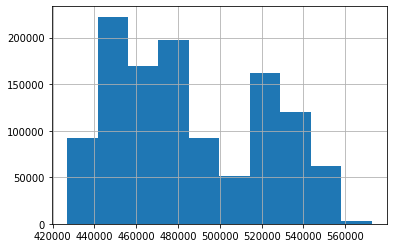

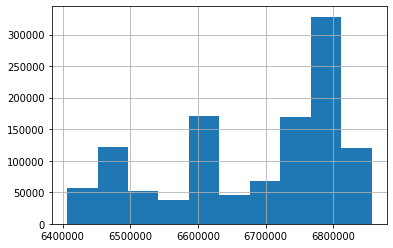

In [16]:
# Check distributions of X_LOC and Y_LOC to see if they make sense
df.X_LOC.hist()
plt.show();

df.Y_LOC.hist()
plt.show();

#### GROUP, FORMATION

STRATEGY:

- Fill missing GROUP & FORMATION values with 'Unknown'

In [17]:
df.loc[df.GROUP.isna(), 'GROUP'] = 'Unknown'
df.loc[df.FORMATION.isna(), 'FORMATION'] = 'Unknown'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1082634 non-null float64
RSHA                                 630650 non-null float64
RMED                                 1131518 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
SGR                                  69353 non-null float64
NPHI                     

#### CALIPER

STRAGEGY:

- Fill CALI values using forward fill (ffill)

In [19]:
df.CALI.fillna(method='ffill', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RSHA                                 630650 non-null float64
RMED                                 1131518 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
SGR                                  69353 non-null float64
NPHI                     

#### SPECTRAL GAMMA RAY (SGR)

STRATEGY:

- Drop SGR column, as 94% of values are missing

In [21]:
# What percentage of SGR values are missing?

df.SGR.isna().sum() / len(df) * 100

94.07498092713354

94% of RSHA values are missing.

In [22]:
df = df.drop('SGR', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 28 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RSHA                                 630650 non-null float64
RMED                                 1131518 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
NPHI                                 765409 non-null float64
PEF                     

#### SHALLOW RESISTIVITY (RSHA)

STRATEGY:

- Drop RSHA column, as 46% of values are missing

In [27]:
# What percentage of RSHA values are missing?

df.RSHA.isna().sum() / len(df) * 100

AttributeError: 'DataFrame' object has no attribute 'RSHA'

In [25]:
df = df.drop('RSHA', axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 27 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1131518 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
NPHI                                 765409 non-null float64
PEF                                  671692 non-null float64
DTC                     

#### MEDIUM RESISTIVITY (RMED)

- Only 3% missing data across many different wells.

STRATEGY:

- Forward fill (ffill) missing RMED data


In [29]:
# What percentage of RMED values are missing?

df.RMED.isna().sum() / len(df) * 100

3.3312800990336697

Only 3% of RMED values missing.

In [32]:
df.loc[df.RMED.isna()]['WELL'].unique()

array(['15/9-17', '16/1-6 A', '16/10-1', '16/10-5', '16/11-1 ST3',
       '16/2-11 A', '16/2-16', '16/4-1', '16/5-3', '17/11-1',
       '25/2-13 T4', '25/3-1', '25/4-5', '25/5-1', '25/5-4', '25/6-3',
       '25/7-2', '25/8-5 S', '25/8-7', '25/9-1', '26/4-1', '29/6-1',
       '30/3-3', '31/2-19 S', '31/3-1', '31/3-2', '31/3-4', '31/4-10',
       '31/4-5', '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/6-3 S',
       '33/9-17', '34/10-19', '34/10-21', '34/10-33', '34/10-35',
       '34/2-4', '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S',
       '34/7-13', '34/7-20', '34/7-21', '34/8-1', '35/11-1', '35/11-12',
       '35/11-13', '35/11-15 S', '35/11-6', '35/12-1', '35/3-7 S',
       '35/4-1', '35/8-6 S', '35/9-2', '35/9-5', '35/9-6 S', '36/7-3',
       '7/1-1', '7/1-2 S'], dtype=object)

In [33]:
df.RMED.fillna(method='ffill', inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 27 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1170511 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
NPHI                                 765409 non-null float64
PEF                                  671692 non-null float64
DTC                     

#### DEEP RESISTIVITY (RDEP)

- Less than 1% RDEP data missing across different wells.

STRATEGY:

- Forward fill (ffill) missing RDEP data

In [35]:
# What percentage of RDEP values are missing?

df.RDEP.isna().sum() / len(df) * 100

0.9410419893533679

Less than 1% of RDEP data is missing.

In [36]:
df.loc[df.RDEP.isna()]['WELL'].unique()

array(['16/10-5', '16/11-1 ST3', '16/2-11 A', '25/5-4', '25/8-7',
       '31/2-1', '31/2-19 S', '31/3-1', '31/5-4 S', '32/2-1', '34/10-33',
       '34/2-4', '35/11-6', '35/9-2', '36/7-3', '7/1-1', '7/1-2 S'],
      dtype=object)

In [37]:
df.RDEP.fillna(method='ffill', inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 27 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1170511 non-null float64
RDEP                                 1170511 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
NPHI                                 765409 non-null float64
PEF                                  671692 non-null float64
DTC                     

#### BULK DENSITY (RHOB)

- 14% of RHOB data is missing across many wells.

STRATEGY:

- Forward fill (ffill) missing RHOB data

In [41]:
# What percentage of RHOB values are missing?

df.RHOB.isna().sum() / len(df) * 100

13.777657792195033

14% of bulk density data is missing.

In [44]:
df.loc[df.RHOB.isna()]['WELL'].unique()

array(['15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1', '16/10-3',
       '16/10-5', '16/11-1 ST3', '16/2-11 A', '16/2-16', '16/2-6',
       '16/4-1', '16/5-3', '16/7-5', '17/11-1', '25/2-13 T4', '25/3-1',
       '25/5-1', '25/6-1', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7',
       '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/6-5', '31/2-19 S',
       '31/2-9', '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-5',
       '31/5-4 S', '31/6-5', '32/2-1', '33/5-2', '33/6-3 S', '33/9-1',
       '33/9-17', '34/10-19', '34/10-21', '34/10-33', '34/10-35',
       '34/12-1', '34/2-4', '34/3-1 A', '34/4-10 R', '34/5-1 A',
       '34/5-1 S', '34/7-20', '34/7-21', '34/8-1', '34/8-3', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12', '35/11-13', '35/11-15 S',
       '35/11-6', '35/11-7', '35/12-1', '35/3-7 S', '35/4-1', '35/8-6 S',
       '35/9-10 S', '35/9-5', '35/9-6 S', '36/7-3', '7/1-1', '7/1-2 S'],
      dtype=object)

The missing RHOB data is spread across many wells.

In [45]:
df.RHOB.fillna(method='ffill', inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 27 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1170511 non-null float64
RDEP                                 1170511 non-null float64
RHOB                                 1170511 non-null float64
GR                                   1170511 non-null float64
NPHI                                 765409 non-null float64
PEF                                  671692 non-null float64
DTC                     

#### Neutron Porosity (NPHI)

- 35% of NPHI data is missing across many wells.

STRATEGY:

- Drop NPHI column from data set. Too much missing data.

In [53]:
# What percentage of NPHI values are missing?

df.NPHI.isna().sum() / len(df) * 100

34.608987015072906

In [54]:
df.loc[df.NPHI.isna()]['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A', '16/2-16',
       '16/2-6', '16/5-3', '16/7-5', '16/8-1', '17/11-1', '25/11-19 S',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/5-1', '25/5-4',
       '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7',
       '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/6-5', '31/2-19 S',
       '31/2-9', '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10',
       '31/4-5', '31/5-4 S', '31/6-5', '32/2-1', '33/6-3 S', '33/9-1',
       '33/9-17', '34/10-19', '34/10-21', '34/10-33', '34/10-35',
       '34/11-1', '34/11-2 S', '34/12-1', '34/2-4', '34/3-1 A',
       '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-20', '34/7-21',
       '34/8-1', '35/11-1', '35/11-10', '35/11-12', '35/11-13',
       '35/11-15 S', '35/11-6', '35/11-7', '35/12-1', '35/4-1', '35/8-4',
       '35/8-6 S', '35/9-10 S', '35/9-2', '35/9-6 S', '36/7-3', '7/1-1',
       '7/1-2 S'], dtype=objec

In [60]:
df = df.drop('NPHI', axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 26 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1170511 non-null float64
RDEP                                 1170511 non-null float64
RHOB                                 1170511 non-null float64
GR                                   1170511 non-null float64
PEF                                  671692 non-null float64
DTC                                  1089648 non-null float64
SP                     

#### PHOTOELECTRIC ABSORPTION FACTOR (PEF)

- 43% of PEF values are missing.

STRATEGY:

-Drop PEF column from data set. Too many missing values.

In [63]:
# What percentage of PEF values are missing?

df.PEF.isna().sum() / len(df) * 100

42.61549015771744

In [70]:
df.loc[df.PEF.isna()]['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/3-1', '25/4-5', '25/5-1', '25/5-4',
       '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7',
       '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S', '30/6-5',
       '31/2-1', '31/2-7', '31/2-8', '31/2-9', '31/3-1', '31/3-2',
       '31/3-3', '31/3-4', '31/4-10', '31/4-5', '31/5-4 S', '31/6-5',
       '31/6-8', '32/2-1', '33/5-2', '33/6-3 S', '33/9-1', '33/9-17',
       '34/10-19', '34/10-21', '34/10-33', '34/10-35', '34/11-1',
       '34/11-2 S', '34/12-1', '34/2-4', '34/3-1 A', '34/4-10 R',
       '34/5-1 A', '34/5-1 S', '34/7-13', '34/7-20', '34/7-21', '34/8-1',
       '34/8-3', '34/8-7 R', '35/11-1', '35/11-10', '35/11-11',
       '35/11-12', '35/11-13', '35/11-1

In [74]:
df = df.drop('PEF', axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 25 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1170511 non-null float64
RDEP                                 1170511 non-null float64
RHOB                                 1170511 non-null float64
GR                                   1170511 non-null float64
DTC                                  1089648 non-null float64
SP                                   864247 non-null float64
BS                     

#### COMPRESSIONAL SLOWNESS (DTC)

- 7% OF DTC values missing.

STRATEGY:

- Forward fill (ffill) missing DTC data

In [76]:
# What percentage of DTC values are missing?

df.DTC.isna().sum() / len(df) * 100

6.9083502846192815

In [77]:
df.loc[df.DTC.isna()]['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-6 A', '16/10-1', '16/10-3',
       '16/10-5', '16/2-11 A', '16/2-16', '16/2-6', '16/4-1', '16/7-5',
       '16/8-1', '17/11-1', '25/11-19 S', '25/2-13 T4', '25/2-14',
       '25/2-7', '25/3-1', '25/4-5', '25/5-1', '25/5-4', '25/6-2',
       '25/7-2', '25/8-5 S', '25/8-7', '25/9-1', '26/4-1', '30/3-3',
       '30/3-5 S', '30/6-5', '31/2-7', '31/2-8', '31/2-9', '31/3-1',
       '31/3-2', '31/3-4', '31/4-10', '31/4-5', '31/5-4 S', '31/6-8',
       '32/2-1', '33/5-2', '33/6-3 S', '33/9-1', '33/9-17', '34/10-19',
       '34/10-21', '34/10-33', '34/10-35', '34/11-1', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-20',
       '34/8-1', '35/11-1', '35/11-11', '35/11-12', '35/11-15 S',
       '35/11-6', '35/11-7', '35/12-1', '35/4-1', '35/8-4', '35/8-6 S',
       '35/9-2', '35/9-6 S', '36/7-3', '7/1-1', '7/1-2 S'], dtype=object)

In [78]:
df.DTC.fillna(method='ffill', inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 25 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1170511 non-null float64
Y_LOC                                1170511 non-null float64
Z_LOC                                1170511 non-null float64
GROUP                                1170511 non-null object
FORMATION                            1170511 non-null object
CALI                                 1170511 non-null float64
RMED                                 1170511 non-null float64
RDEP                                 1170511 non-null float64
RHOB                                 1170511 non-null float64
GR                                   1170511 non-null float64
DTC                                  1170511 non-null float64
SP                                   864247 non-null float64
BS                     